<a href="https://colab.research.google.com/github/Viniciusp67/Consultor-de-Direito-Eleitoral/blob/main/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install plotly
!pip install yfinance

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [16]:
#Importar dados usando yfinance
def get_crypto_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

In [17]:
#obtenção de dados
ticker = 'BTC-USD'  # Bitcoin
start_date = '2016-01-01'
end_date = '2023-01-01'
data = get_crypto_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


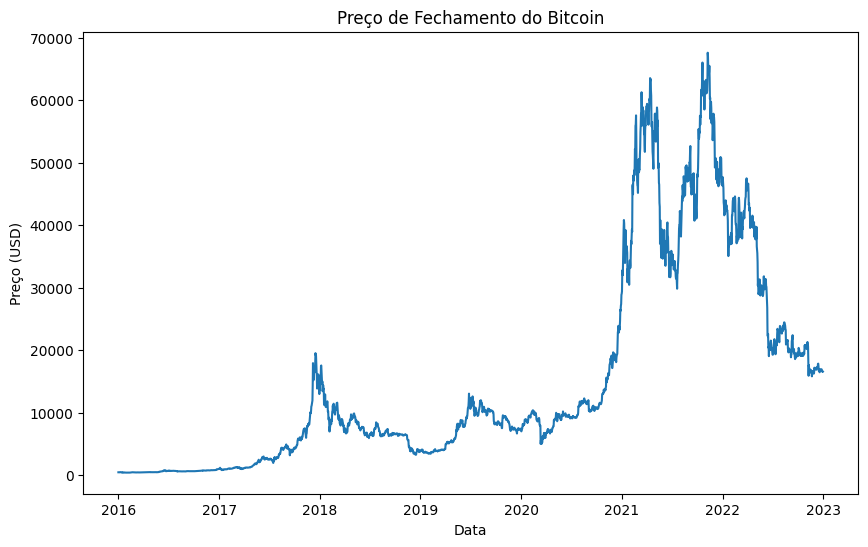

In [18]:
#Visualização dos dados
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Preço de Fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.show()

In [19]:
#Preparar os dados
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

In [20]:
n_steps = 50  # Número de passos de tempo
data = data.values  # Converter para numpy array
X, y = prepare_data(data, n_steps)


In [21]:
# Redimensionando os dados
X = X.reshape((X.shape[0], X.shape[1], 1))

In [22]:
#Construir e treinar o modelo
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 50, 100)           20800     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51051 (199.42 KB)
Trainable params: 51051 (199.42 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [24]:
# Treinamento do modelo
history = model.fit(X, y, epochs=120, batch_size=32, validation_split=0.2)

Epoch 1/120
63/63 [==============================] - 13s 97ms/step - loss: 287617952.0000 - val_loss: 1427354240.0000
Epoch 2/120
63/63 [==============================] - 4s 62ms/step - loss: 287471840.0000 - val_loss: 1427065856.0000
Epoch 3/120
63/63 [==============================] - 5s 80ms/step - loss: 287392064.0000 - val_loss: 1426818816.0000
Epoch 4/120
63/63 [==============================] - 4s 62ms/step - loss: 287317856.0000 - val_loss: 1426583168.0000
Epoch 5/120
63/63 [==============================] - 4s 62ms/step - loss: 287246784.0000 - val_loss: 1426350080.0000
Epoch 6/120
63/63 [==============================] - 5s 82ms/step - loss: 287180384.0000 - val_loss: 1426123776.0000
Epoch 7/120
63/63 [==============================] - 4s 63ms/step - loss: 287113376.0000 - val_loss: 1425899648.0000
Epoch 8/120
63/63 [==============================] - 4s 62ms/step - loss: 287045376.0000 - val_loss: 1425676544.0000
Epoch 9/120
63/63 [==============================] - 5s 83ms/st

In [25]:
# Avaliação do modelo
loss = model.evaluate(X, y)
print(f'Model Loss: {loss}')

79/79 [==============================] - 2s 19ms/step - loss: 504406144.0000
Model Loss: 504406144.0


In [26]:
# Previsões
predictions = model.predict(X)

79/79 [==============================] - 3s 17ms/step


In [ ]:
# Visualizar previsões
plt.figure(figsize=(10, 6))
plt.plot(data[n_steps:], label='Preço Real')
plt.plot(predictions, label='Previsões')
plt.title('Previsões de Preços do Bitcoin')
plt.xlabel('Dias')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()